In [1]:
%cd ..

/home/maverick/Projects/ml-scratchpad


/home/maverick/Projects/ml-scratchpad/.venv/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
!ls

configs/  environment.yaml  notebooks/      README.md         scripts/  src/
data/     logs/             pyproject.toml  requirements.txt  setup.py


In [42]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import albumentations as A

from src.data.core_datasets.phrasecutdataset import PhraseCutDataset

In [4]:
ds = PhraseCutDataset(data_root="/run/media/maverick/Backup/datasets/phrasecut", task_json_path="refer_train.json", tokenizer_pretrained_path="openai/clip-vit-base-patch32")

In [6]:
ds.tasks.__sizeof__(), ds.phrase2image_ids.__sizeof__(), ds.unique_phrases.__sizeof__()

(2486552, 1922464, 639984)

In [10]:
num_images_per_phrase = list(map(len, ds.phrase2image_ids.values()))

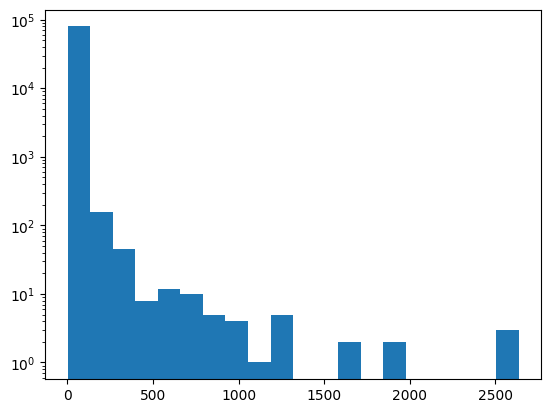

In [11]:
plt.hist(num_images_per_phrase, bins=20, log=True);

## Shape Analysis

In [14]:
unique_image_ids = set(task["image_id"] for task in ds.tasks)
len(unique_image_ids)

71746

In [ ]:
shapes = []
for image_id in unique_image_ids:
    try:
        image = ds.load_image(ds.image_path / f"{image_id}.jpg", cv2.IMREAD_COLOR)
    except ValueError:
        pass
    else:
        shapes.append(image.shape[:-1])

In [20]:
shapes

[(960, 1280),
 (768, 1024),
 (1024, 768),
 (1024, 683),
 (584, 1024),
 (770, 1024),
 (768, 1024),
 (768, 1024),
 (960, 1280),
 (768, 1024),
 (742, 1024),
 (683, 1024),
 (583, 1024),
 (612, 612),
 (800, 523),
 (768, 1024),
 (683, 1024),
 (768, 1024),
 (768, 1024),
 (683, 1024),
 (683, 1024),
 (683, 1024),
 (614, 1024),
 (480, 360),
 (576, 1024),
 (1024, 685),
 (435, 1024),
 (1024, 768),
 (1024, 768),
 (612, 612),
 (768, 1024),
 (590, 858),
 (684, 1024),
 (768, 1024),
 (533, 800),
 (644, 1024),
 (767, 1024),
 (1024, 576),
 (683, 1024),
 (1024, 683),
 (934, 1280),
 (612, 612),
 (1024, 612),
 (574, 864),
 (768, 1024),
 (800, 708),
 (853, 1280),
 (678, 1024),
 (681, 1024),
 (683, 1024),
 (768, 1024),
 (754, 1024),
 (683, 1024),
 (683, 1024),
 (683, 1024),
 (768, 1024),
 (788, 1185),
 (612, 612),
 (768, 1024),
 (600, 900),
 (877, 1024),
 (678, 1024),
 (768, 1024),
 (768, 1024),
 (768, 1024),
 (1024, 768),
 (1024, 685),
 (810, 1200),
 (765, 1024),
 (768, 1024),
 (1024, 768),
 (1024, 765),
 (5

In [36]:
target_size = 224

scaled_sizes = []
for shape in shapes:
    min_shape = min(shape)

    scale = target_size / min_shape

    h, w = shape
    
    scaled_sizes.append((round(h*scale), round(w*scale)))

In [37]:
scaled_sizes

[(224, 299),
 (224, 299),
 (299, 224),
 (336, 224),
 (224, 393),
 (224, 298),
 (224, 299),
 (224, 299),
 (224, 299),
 (224, 299),
 (224, 309),
 (224, 336),
 (224, 393),
 (224, 224),
 (343, 224),
 (224, 299),
 (224, 336),
 (224, 299),
 (224, 299),
 (224, 336),
 (224, 336),
 (224, 336),
 (224, 374),
 (299, 224),
 (224, 398),
 (335, 224),
 (224, 527),
 (299, 224),
 (299, 224),
 (224, 224),
 (224, 299),
 (224, 326),
 (224, 335),
 (224, 299),
 (224, 336),
 (224, 356),
 (224, 299),
 (398, 224),
 (224, 336),
 (336, 224),
 (224, 307),
 (224, 224),
 (375, 224),
 (224, 337),
 (224, 299),
 (253, 224),
 (224, 336),
 (224, 338),
 (224, 337),
 (224, 336),
 (224, 299),
 (224, 304),
 (224, 336),
 (224, 336),
 (224, 336),
 (224, 299),
 (224, 337),
 (224, 224),
 (224, 299),
 (224, 336),
 (224, 262),
 (224, 338),
 (224, 299),
 (224, 299),
 (224, 299),
 (299, 224),
 (335, 224),
 (224, 332),
 (224, 300),
 (224, 299),
 (299, 224),
 (300, 224),
 (224, 336),
 (224, 334),
 (224, 398),
 (224, 299),
 (224, 346),

In [40]:
diff = [(h-target_size, w-target_size) for h, w in scaled_sizes]
diff

[(0, 75),
 (0, 75),
 (75, 0),
 (112, 0),
 (0, 169),
 (0, 74),
 (0, 75),
 (0, 75),
 (0, 75),
 (0, 75),
 (0, 85),
 (0, 112),
 (0, 169),
 (0, 0),
 (119, 0),
 (0, 75),
 (0, 112),
 (0, 75),
 (0, 75),
 (0, 112),
 (0, 112),
 (0, 112),
 (0, 150),
 (75, 0),
 (0, 174),
 (111, 0),
 (0, 303),
 (75, 0),
 (75, 0),
 (0, 0),
 (0, 75),
 (0, 102),
 (0, 111),
 (0, 75),
 (0, 112),
 (0, 132),
 (0, 75),
 (174, 0),
 (0, 112),
 (112, 0),
 (0, 83),
 (0, 0),
 (151, 0),
 (0, 113),
 (0, 75),
 (29, 0),
 (0, 112),
 (0, 114),
 (0, 113),
 (0, 112),
 (0, 75),
 (0, 80),
 (0, 112),
 (0, 112),
 (0, 112),
 (0, 75),
 (0, 113),
 (0, 0),
 (0, 75),
 (0, 112),
 (0, 38),
 (0, 114),
 (0, 75),
 (0, 75),
 (0, 75),
 (75, 0),
 (111, 0),
 (0, 108),
 (0, 76),
 (0, 75),
 (75, 0),
 (76, 0),
 (0, 112),
 (0, 110),
 (0, 174),
 (0, 75),
 (0, 122),
 (0, 11),
 (113, 0),
 (0, 75),
 (107, 0),
 (0, 112),
 (113, 0),
 (112, 0),
 (0, 112),
 (0, 100),
 (0, 75),
 (0, 45),
 (0, 130),
 (0, 110),
 (0, 75),
 (0, 75),
 (0, 75),
 (0, 112),
 (0, 75),
 (0, 7

## Augementation Analysis

In [59]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

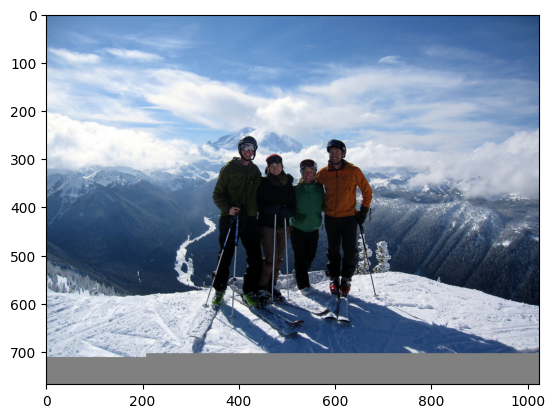

In [66]:
plt.imshow(image);

In [185]:
transforms = A.Compose([
    A.SmallestMaxSize(size),
    A.Rotate(10, border_mode=cv2.BORDER_REPLICATE, p=1),
    A.RandomCrop(width=size, height=size, p=1),
    A.RandomBrightnessContrast(p=1, contrast_limit=0.1, brightness_limit=0.1, brightness_by_max=False),
])

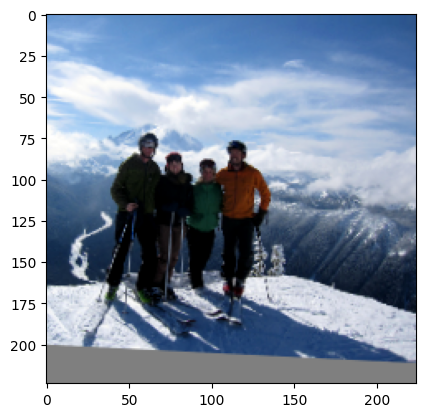

In [186]:
transformed = transforms(image=image)
plt.imshow(transformed["image"]);